# Chapter 7. 시계열 데이터를 다뤄보자

* Numpy의 polyfit으로 regression 분석하기
* Prophet 모듈을 이용한 forecast 예측
* Seasonal 시계열 분석으로 주식데이터 분석
* Growth Model과 Holiday Forecast

In [31]:
import os
os.chdir("D:\OneDrive\Scripts\Python\Study\파이썬으로_데이터_주무르기")
#plt.rc('font',family='NanumGothic') ## 그래프 한글 표시
#plt.rc('font',family='AppleGothic') ## 그래프 한글 표시
#sns.set_style('whitegrid')

In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web


import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',family='NanumGothic')

from fbprophet import Prophet
from datetime import datetime

In [33]:
pinkwink_web = pd.read_csv(r'data\08. PinkWink Web Traffic.csv', encoding='utf-8',
                          thousands=',', names=['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


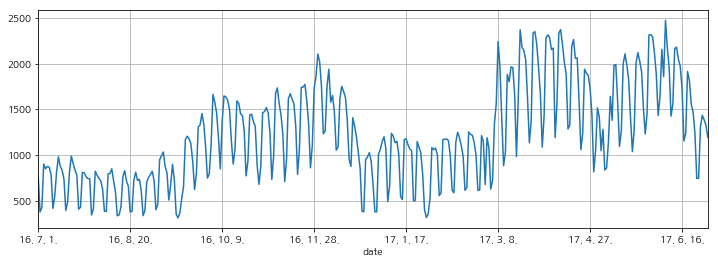

In [34]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [35]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [36]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [37]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.62841018946943
429.53280466762925
330.47773026564636


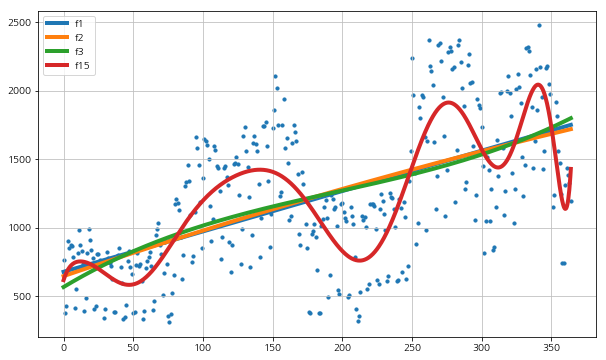

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)

In [45]:
# Prophet 모듈을 이용한 forecast 예측

df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


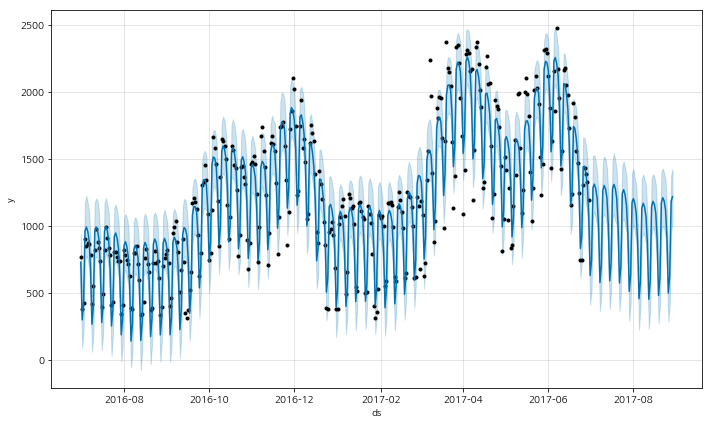

In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

m.plot(forecast);

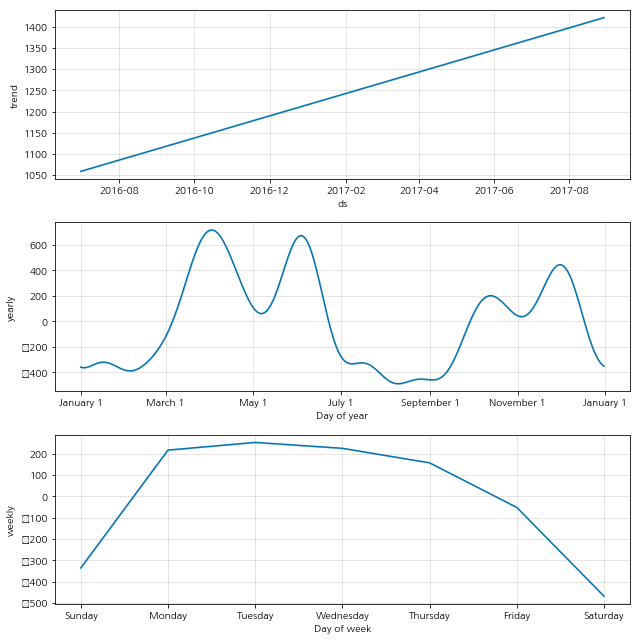

In [48]:
m.plot_components(forecast);

In [49]:
# Seasonal 시계열 분석으로 주식 데이터 분석하기

from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '2010-03-01'
end_date = '2017-06-30'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)


[*********************100%***********************]  1 of 1 downloaded


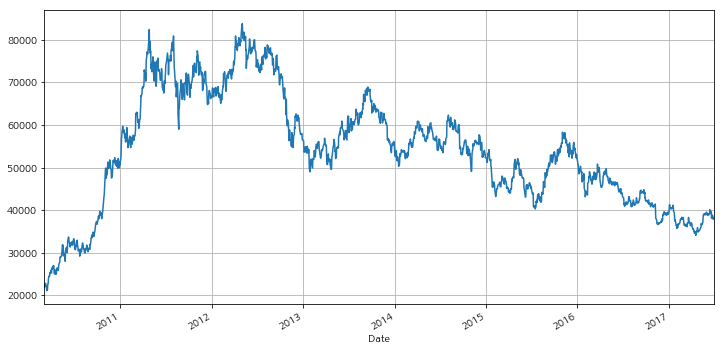

In [50]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [51]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,19076.033203,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,19556.207031,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,19643.511719,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,19861.773438,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,19905.423828,4326618
2010-03-09,22550.0,22650.0,22050.0,22050.0,19250.642578,4707240
2010-03-10,22200.0,22250.0,21750.0,22200.0,19381.599609,4146645
2010-03-11,22200.0,22350.0,21750.0,21800.0,19032.382813,3833839
2010-03-12,21800.0,21900.0,21100.0,21100.0,18421.250000,6123788


In [52]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [53]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [54]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2055,2017-12-25
2056,2017-12-26
2057,2017-12-27
2058,2017-12-28
2059,2017-12-29


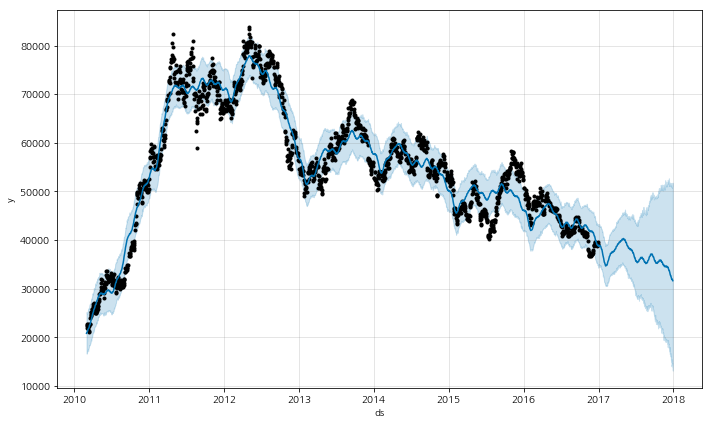

In [55]:
fcst = m.predict(future)
m.plot(fcst);

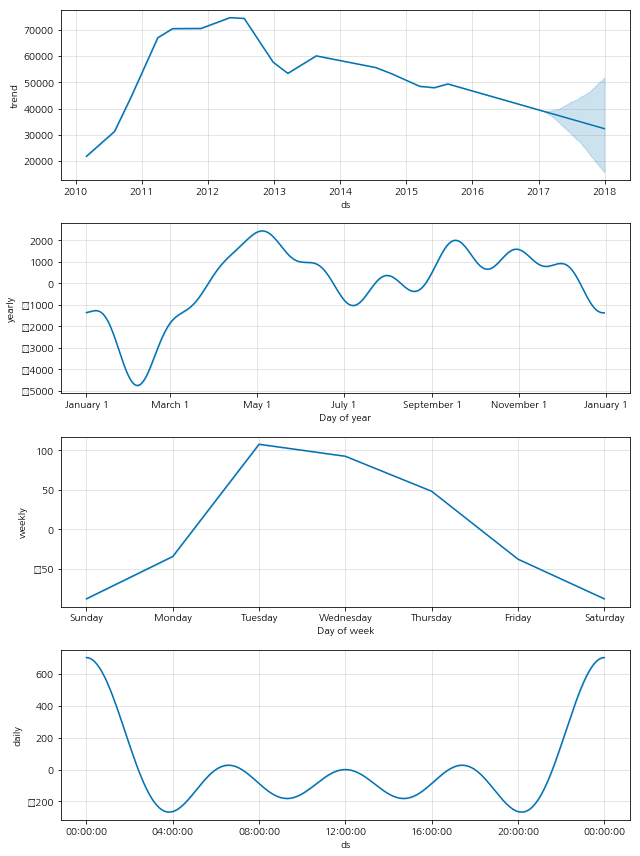

In [56]:
m.plot_components(fcst);

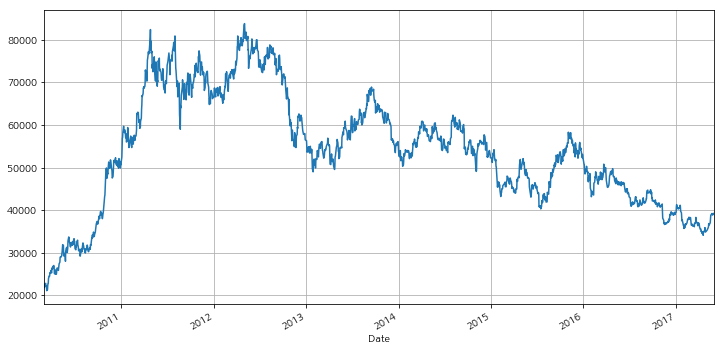

In [57]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12, 6), grid=True)

In [58]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

m = Prophet(daily_seasonality=True)
m.fit(df)

In [59]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
1852,2017-07-27
1853,2017-07-28
1854,2017-07-29
1855,2017-07-30
1856,2017-07-31


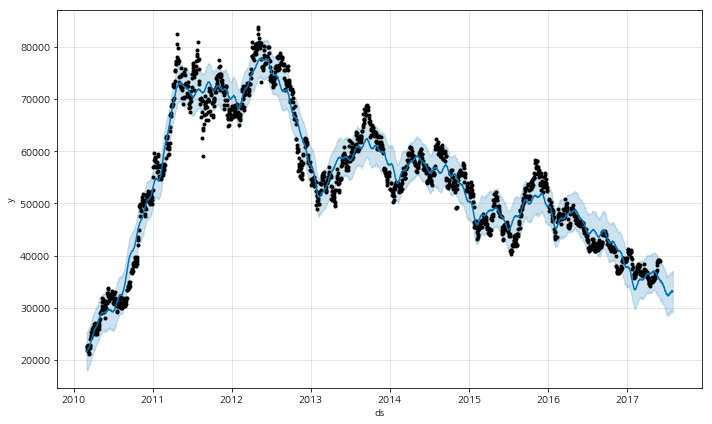

In [60]:
forecast = m.predict(future)
m.plot(forecast);

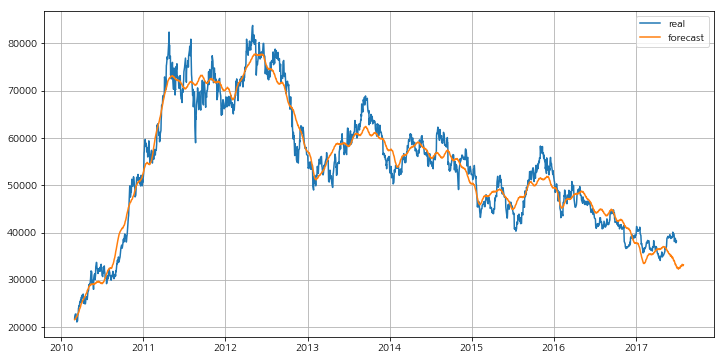

In [61]:
plt.figure(figsize = (12, 6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()

In [62]:
# Forecast by using Prophet

df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
# 60일 간의 데이터를 예측하고자 할 때 periods를 설정
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [64]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,913.289787,698.821767,1130.451054
421,2017-08-26,498.369973,282.195603,718.824308
422,2017-08-27,630.875003,423.278252,850.263882
423,2017-08-28,1183.290919,983.041674,1395.189370
424,2017-08-29,1219.186560,1021.469994,1428.587377


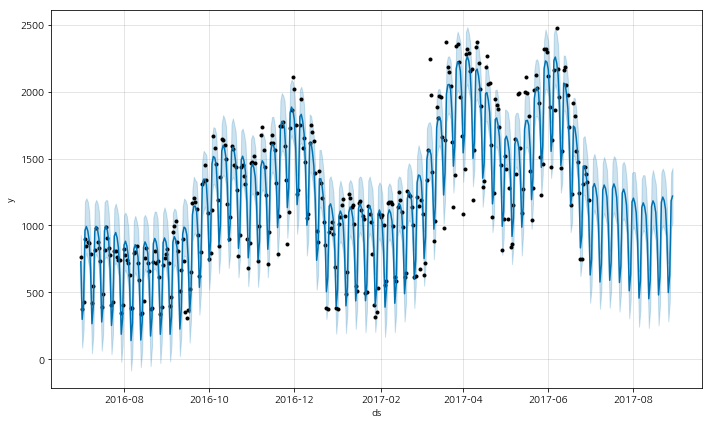

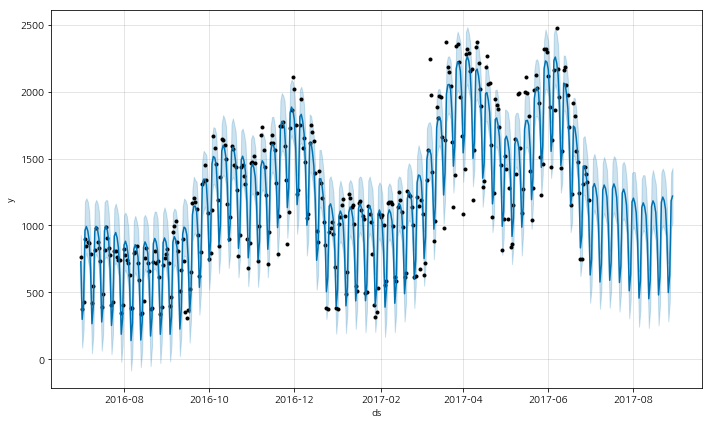

In [65]:
m.plot(forecast)

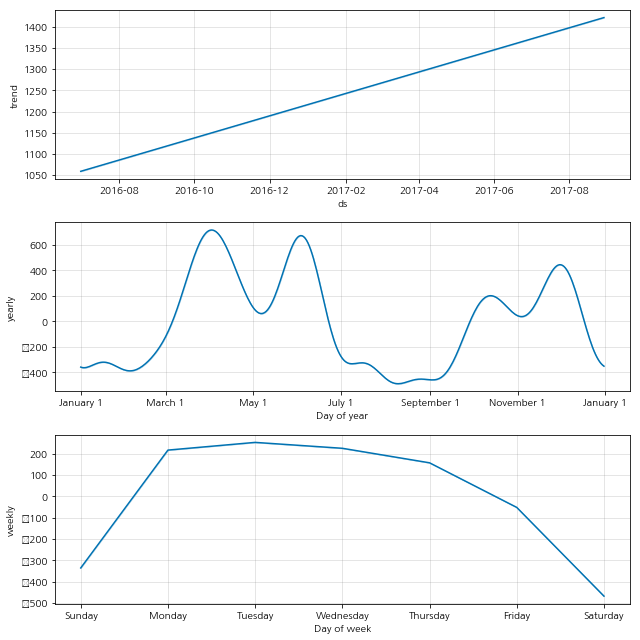

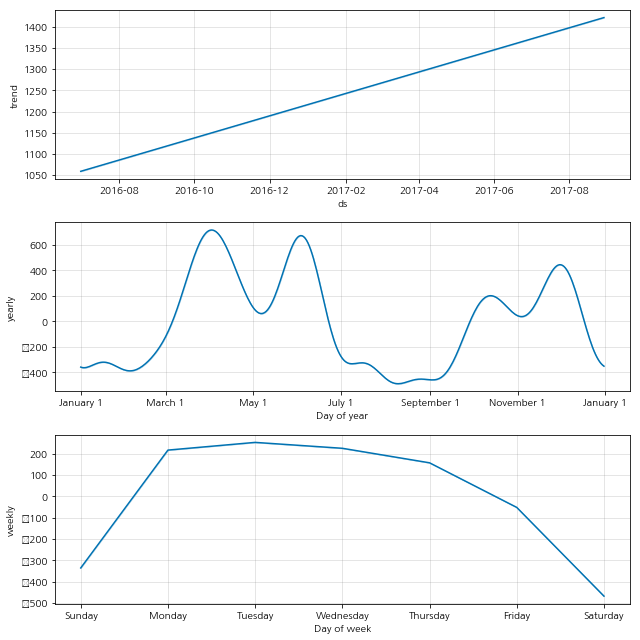

In [66]:
m.plot_components(forecast)

In [67]:
# Growth Model과 Holiday Forecast

df = pd.read_csv(r'data\08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df['cap'] = 8.5
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

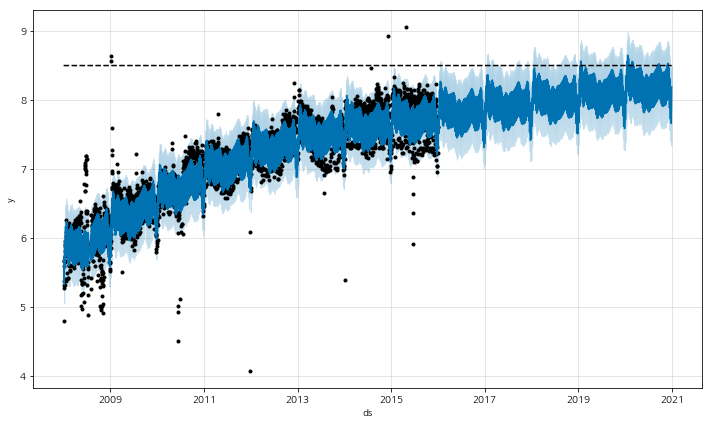

In [68]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

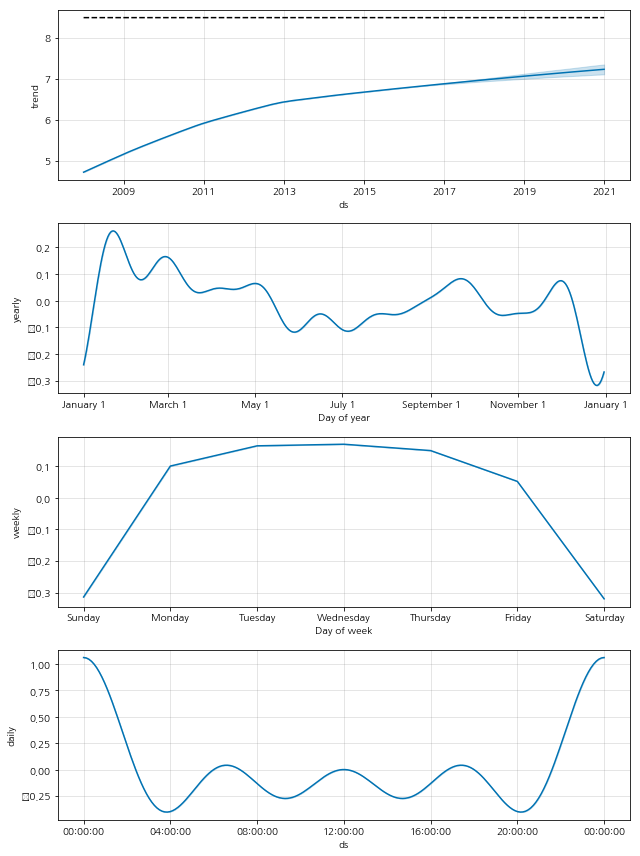

In [69]:
forecast = m.predict(future)
m.plot_components(forecast);